In [5]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv('../data/izq_econ_news.csv')

In [7]:
df.shape

(144, 7)

In [8]:
df.head(5)

,Unnamed: 0,date,flyer,lead,headline,body,url
0,0,\nLunes 30 de noviembre,SENADO,El objetivo sería “proteger a la Argentina de ...,¿Qué dice la ley de “sostenibilidad de la deud...,Este lunes los senadores dieron media sanción ...,https://www.laizquierdadiario.com/Economia/Que...
1,1,\nLunes 30 de noviembre,ECONOMÍA,"El ministro de Trabajo, Claudio Moroni, confir...",Doble indemnización: pese a no frenar los desp...,El Gobierno nacional prorrogó hasta el próximo...,https://www.laizquierdadiario.com/Economia/Dob...
2,2,\nDomingo 29 de noviembre,AJUSTAN AL SALARIO,El último tramo del aumento se pagaría con el ...,Paritarias estatales de Jujuy: ¿qué cambia con...,El viernes 27/11 por la tarde el Gobierno lueg...,https://www.laizquierdadiario.com/Economia/Par...
3,3,\nSábado 28 de noviembre,JUBILACIONES,El proyecto del Ejecutivo para una nueva ley d...,Escándalo: el Gobierno quiere descontar a los ...,"En un nuevo intento de robo a los jubilados, e...",https://www.laizquierdadiario.com/Economia/Esc...
4,4,\nSábado 28 de noviembre,A PEDIDO DEL FMI,Se oficializa el ataque a las jubilaciones y p...,Ajuste a jubilados: el Gobierno envió al Congr...,El Ejecutivo giró este sábado al Congreso su p...,https://www.laizquierdadiario.com/Economia/Aju...


In [9]:
df.flyer.values

array(['SENADO', 'ECONOMÍA', 'AJUSTAN AL SALARIO ', 'JUBILACIONES',
       'A PEDIDO DEL FMI', 'CONSUMO', 'CIERRE DE MINA AGUILAR S.A.',
       'BRECHA CAMBIARIA', 'INFORME INDEC', 'OPTIMISMO EN LOS “MERCADOS”',
       'INFORME INDEC', 'LEVANTARLA EN PALA',
       'SEMANA ECONÓMICA EN CLAVES', 'INFLACIÓN', 'ESTADOS UNIDOS',
       'INFLACION', 'SOCIEDAD', 'AJUSTE A PEDIDO DEL FMI ',
       'TARIFAS E INFLACIÓN', 'CHANTAJE EMPRESARIAL ', 'TRIBUNA ABIERTA',
       'TUCUMÁN', 'CUMBRE DEL G20', 'PRECIOS', 'COMUNICADO DE PRENSA',
       'DOBLE DISCURSO', 'LICITACIÓN', 'AJUSTE',
       'ESTIMACIÓN JUNTA INTERNA ATE INDEC', 'INFORME INDEC', 'AJUSTE',
       'ANUNCIO OFICIAL', 'EXPORTACIONES', 'DÓLAR Y BRECHA',
       'CELEBRAN LAS PATRONALES AGRARIAS', 'INFORME INDEC', 'AJUSTE',
       'PRESUPUESTO 2021', 'MULTINACIONALES MINERAS',
       'GANANCIA EMPRESARIA', 'NO AL AJUSTE A PEDIDO DEL FMI',
       'COMERCIO INTERNACIONAL', 'MULTINACIONALES MINERAS', 'ACTUALIDAD',
       'ENTREVISTA', 'CONS

Tópicos

In [10]:
df[df.flyer.str.contains('DEUDA|Deuda|BONO', na=False)].shape

(11, 7)

In [11]:
df[df.flyer.str.contains('BRECHA|CAMBI|RESERV', na=False)].shape

(13, 7)

In [12]:
df[df.flyer.str.contains('INFLA|INDEC|SUBA|PRECIO', na=False)].shape

(16, 7)

In [13]:
df[df.flyer.str.contains('FMI|FONDO', na=False)].shape

(5, 7)

In [14]:
df[df.flyer.str.contains('SALARIO|OBRER|TRABAJA', na=False)].shape

(3, 7)

Corpus

In [15]:
df_inflacion = df.loc[df.flyer.str.contains('INFLA|INDEC|SUBA|PRECIO', na=False),'lead'].values

In [16]:
df_cambio = df.loc[df.flyer.str.contains('BRECHA|CAMBI|RESERV', na=False), 'lead'].values

In [17]:
corpus = list(df_inflacion) + list(df_cambio)
len(corpus)

29

In [18]:
corpus

['Las exportaciones se derrumbaron un 21,6 % respecto al mismo mes del año anterior, la baja más pronunciada de los últimos cinco años. Los exportadores esperan un tipo de cambio más alto.',
 'El Estimador Mensual de la Actividad Económica (EMAE) acumula una baja de 11,9 % en los nueve meses del año. Se estima que la economía caerá este año un 11,6 % interanual.',
 'Será de un 7% y se aplicará a las marcas que fabrica la tabacalera British American Tobacco (BAT), como Lucky Strike.',
 'El resto de las cadenas ajustarán sus valores en las próximas horas. Esto afectará a la ya acelerada inflación.',
 'Es de un 2,5 % a partir de las 0 de hoy. Desde agosto, el liberal Guillermo Nielsen ajusta cada mes un poco más el precio en surtidores. Efecto arrastre en la economía y más inflación.',
 'El poder de compra del salario cae con la suba de precios. Los acuerdos paritarios cierran por debajo de la inflación que será del 35,8 %, según estiman las consultoras. Sectores de trabajadores se movili

#### Tokenización y vectores
CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
stopwords_sp = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words = stopwords_sp, lowercase = True, strip_accents='unicode');
vectorizer.fit(corpus)

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian'

CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode')

In [25]:
print(len(vectorizer.vocabulary_))

369


In [29]:
matriz_densa = vectorizer.transform(corpus);
print(matriz_densa)

  (0, 19)	1
  (0, 58)	1
  (0, 62)	1
  (0, 63)	1
  (0, 65)	1
  (0, 80)	1
  (0, 104)	1
  (0, 117)	1
  (0, 135)	1
  (0, 163)	1
  (0, 169)	1
  (0, 170)	1
  (0, 227)	2
  (0, 242)	1
  (0, 251)	1
  (0, 300)	1
  (0, 322)	1
  (0, 353)	1
  (0, 361)	1
  (1, 1)	2
  (1, 39)	1
  (1, 42)	1
  (1, 62)	2
  (1, 80)	1
  (1, 99)	1
  :	:
  (28, 15)	1
  (28, 23)	1
  (28, 54)	1
  (28, 61)	1
  (28, 64)	1
  (28, 88)	1
  (28, 92)	1
  (28, 115)	1
  (28, 121)	1
  (28, 127)	1
  (28, 145)	1
  (28, 147)	2
  (28, 157)	1
  (28, 186)	1
  (28, 206)	1
  (28, 213)	1
  (28, 217)	1
  (28, 227)	1
  (28, 232)	1
  (28, 240)	1
  (28, 245)	1
  (28, 260)	1
  (28, 267)	1
  (28, 284)	1
  (28, 340)	1


In [36]:
matriz_dispersa = matriz_densa.todense()
matriz_dispersa[0]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
         1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [35]:
vectorizer.get_feature_names()[:20]

['000',
 '11',
 '12',
 '14',
 '140',
 '143',
 '145',
 '147',
 '149',
 '156',
 '165',
 '169',
 '171',
 '175',
 '179',
 '183',
 '195',
 '2019',
 '2020',
 '21']

In [37]:
dummies = pd.DataFrame(matriz_dispersa, columns=vectorizer.get_feature_names())

In [38]:
dummies

,000,11,12,14,140,143,145,147,149,156,...,transporte,tres,ultimos,va,valores,venderlo,vez,vienen,viernes,volvera
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Term Frequency Inverse Document Frequency (TF-IDF)
TfidfVectorizer, TfidfTransformer

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
matriz_tfidf = TfidfTransformer().fit_transform(matriz_dispersa);

In [47]:
print(matriz_tfidf)

  (0, 361)	0.2232333059328043
  (0, 353)	0.2506401142283417
  (0, 322)	0.18870481096976033
  (0, 300)	0.2506401142283417
  (0, 251)	0.2232333059328043
  (0, 242)	0.17638105769167836
  (0, 227)	0.28370512545726884
  (0, 170)	0.2506401142283417
  (0, 169)	0.2506401142283417
  (0, 163)	0.2506401142283417
  (0, 135)	0.2506401142283417
  (0, 117)	0.20378786598721577
  (0, 104)	0.2506401142283417
  (0, 80)	0.20378786598721577
  (0, 65)	0.18870481096976033
  (0, 63)	0.2506401142283417
  (0, 62)	0.16596147276027803
  (0, 58)	0.20378786598721577
  (0, 19)	0.2506401142283417
  (1, 261)	0.242374783907742
  (1, 243)	0.19706757688704435
  (1, 239)	0.242374783907742
  (1, 201)	0.2158717667882236
  (1, 166)	0.242374783907742
  (1, 165)	0.242374783907742
  :	:
  (28, 267)	0.18239979846976653
  (28, 260)	0.20479339376647507
  (28, 245)	0.20479339376647507
  (28, 240)	0.1541872049393937
  (28, 232)	0.18239979846976653
  (28, 227)	0.11590510092571561
  (28, 217)	0.20479339376647507
  (28, 213)	0.16651128

In [43]:
dummies_tfidf = pd.DataFrame(matriz_tfidf.todense(), columns = vectorizer.get_feature_names())

In [48]:
dummies_tfidf.head(10)

,000,11,12,14,140,143,145,147,149,156,...,transporte,tres,ultimos,va,valores,venderlo,vez,vienen,viernes,volvera
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.223233,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.48475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.312682,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
5,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
6,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.231218
7,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.248417,0.000000,0.0,0.0,0.278916,0.0,0.000000
8,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248797,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
9,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [50]:
dummies_tfidf.iloc[0].sort_values(ascending=False)

mas             0.283705
derrumbaron     0.250640
exportadores    0.250640
pronunciada     0.250640
anos            0.250640
                  ...   
mientras        0.000000
miercoles       0.000000
miles           0.000000
millones        0.000000
000             0.000000
Name: 0, Length: 369, dtype: float64

In [51]:
dummies_tfidf.iloc[1].sort_values(ascending=False)

11            0.484750
ano           0.320977
emae          0.242375
estimador     0.242375
economica     0.242375
                ...   
millones      0.000000
minimos       0.000000
ministerio    0.000000
miserable     0.000000
000           0.000000
Name: 1, Length: 369, dtype: float64

#### Singular Value Decomposition (SVD)

In [153]:
from sklearn.decomposition import TruncatedSVD

In [154]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(matriz_tfidf)

P = np.around(p,3)

In [155]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

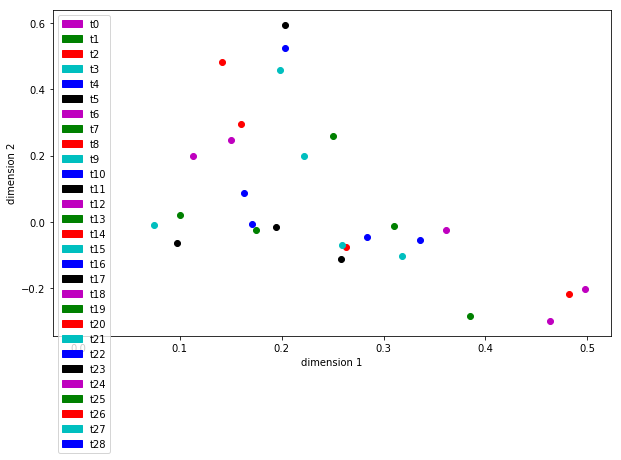

In [156]:
color = ['m', 'g', 'r', 'c', 'b','k'] + ['m', 'g', 'r', 'c', 'b','k'] + ['m', 'g', 'r', 'c', 'b','k'] + ['m', 'g', 'r', 'c', 'b','k'] + ['m', 'g', 'r', 'c', 'b','k']
plt.figure(figsize=(10, 6))
patches = []

for i,texto in enumerate(corpus):
    plt.plot(P[i,0], P[i,1], color[i]+"o")
    patches.append(mpatches.Patch(color=color[i], label='t'+str(i)))

plt.legend(handles=patches)
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [157]:
P

array([[ 0.361, -0.026],
       [ 0.175, -0.026],
       [-0.   , -0.036],
       [ 0.075, -0.011],
       [ 0.284, -0.045],
       [ 0.258, -0.112],
       [ 0.463, -0.301],
       [ 0.31 , -0.013],
       [ 0.482, -0.22 ],
       [ 0.318, -0.105],
       [ 0.336, -0.057],
       [ 0.097, -0.064],
       [ 0.498, -0.205],
       [ 0.385, -0.284],
       [ 0.263, -0.078],
       [ 0.259, -0.072],
       [ 0.171, -0.006],
       [ 0.203,  0.596],
       [ 0.113,  0.2  ],
       [ 0.25 ,  0.26 ],
       [ 0.141,  0.484],
       [ 0.222,  0.199],
       [ 0.163,  0.087],
       [ 0.194, -0.015],
       [ 0.15 ,  0.247],
       [ 0.1  ,  0.021],
       [ 0.16 ,  0.296],
       [ 0.198,  0.459],
       [ 0.203,  0.525]])

In [158]:
comp1, comp2 = svd.components_

In [159]:
indices1 = np.argsort(comp1)

In [164]:
indices1 = indices1[::-1]
indices1[:20]

array([225, 338, 171,  93, 346, 355,  85,  70,  60, 219, 275, 282,  40,
       308, 313, 236, 198, 156, 128, 138])

In [161]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [163]:
indices2[:20]

array([147,  92, 127, 240, 186, 213,   6, 234, 115, 130, 214, 285, 103,
       232, 223, 271, 267,  88,   3, 341])

In [169]:
dim1 = np.array(vectorizer.get_feature_names())[indices1]
print(f'Dimensión 1:\n{dim1}')

Dimensión 1:
['marcas' 'strike' 'fabrica' 'british' 'tabacalera' 'tobacco' 'bat'
 'aplicara' 'american' 'lucky' 'parte' 'permitio' 'actividades'
 'reapertura' 'recuperar' 'mejoro' 'industrial' 'empleo' 'contraccion'
 'descenso' 'desplomo' 'colocar' 'interes' 'acumulacion' 'tasa' 'podra'
 '60' 'ligados' 'fracasos' 'calmar' 'especuladores' 'equivalente'
 'emitiran' 'buscan' 'acelerada' 'afectara' 'ajustaran' 'cadenas' 'resto'
 'proximas' 'horas' 'aumenta' 'arrancaron' 'ahorro' 'tercera' 'supera'
 'financieros' 'sesion' 'consecutiva' '140' 'anuncios' 'descendio' 'cerca'
 'nuevos' 'cayendo' 'realizara' 'martes' '165' '143' 'bajo' 'viernes'
 'festival' 'desciende' 'central' 'banco' 'aumento' 'cerrar' 'medio'
 'pases' 'rendimientos' 'punto' 'plan' '175' 'estima' 'caera' 'nueve'
 'estimador' 'mensual' 'economica' 'emae' 'frente' 'quiere' 'protegerse'
 'preserva' 'fondo' 'fraudulenta' 'grifo' 'pequeno' 'super' 'pagar'
 'ahorrista' 'oficialismo' 'cepo' 'encendiendo' '169' '32' '183' 'disparo'
 

In [170]:
dim2 = np.array(vectorizer.get_feature_names())[indices2]
print(f'Dimensión 1:\n{dim2}')

Dimensión 1:
['dolar' 'brecha' 'contado' 'mep' 'guzman' 'liqui' '145' 'medidas' 'cerro'
 'cotizaciones' 'liquidacion' 'pesos' 'cambiaria' 'mayorista' 'mantiene'
 'paralelo' 'oficial' 'blue' '14' 'subio' 'encontraron' 'bajar' '54'
 'limite' 'paralelas' 'finalizo' '58' '149' '87' 'paz' 'pesar' 'pro'
 'abandono' 'escalo' 'mercado' '83' '82' 'mantuvo' 'manteniendo' 'record'
 'asi' 'financieras' 'descienden' 'respectivamente' '171' '156' '96' '99'
 'semana' '147' 'concesiones' 'jornada' 'pese' 'miercoles' 'nueva' 'llego'
 'alarmas' '169' '179' '183' 'encendiendo' '32' 'disparo' 'subas' 'amplia'
 'anota' 'alza' 'dolares' 'bonos' 'acumula' 'mayor' 'cinco' 'deuda' '143'
 '165' 'descendio' 'nuevos' 'viernes' 'cerca' 'realizara' 'cayendo'
 'martes' 'anuncios' 'bajo' 'tambien' 'mas' 'aumento' '175' 'festival'
 'desciende' 'rendimientos' 'plan' 'central' 'pases' 'cerrar' 'medio'
 'punto' 'banco' 'alcanzado' '23' 'rueda' 'billete' 'pasado' '28' '195'
 'casi' 'rebote' 'luego' '140' 'tercera' 'ahorro